<a href="https://colab.research.google.com/github/tiagopessoalima/ED2/blob/main/Aula_Semana_05_(ED2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Listas Duplamente Ligadas (Encadeadas)**

Assim como as listas simplesmente ligadas, as Listas Duplamente Ligadas são estruturas de dados **lineares** e **dinâmicas**. A principal diferença reside na forma como os nós se conectam: cada nó em uma lista duplamente ligada possui três componentes principais:

1. **Valor** armazenado (dado propriamente dito);
2. **Referência** (ou ponteiro) para o próximo nó da sequência (`proximo`);
3. **Referência** (ou ponteiro) para o nó anterior da sequência (`anterior`).

Essa ligação bidirecional permite a travessia da lista em ambos os sentidos (do início para o fim e do fim para o início). Isso otimiza certas operações, como a remoção de um nó específico (se já tivermos a referência para ele) ou a inserção/remoção no final da lista, que podem ser realizadas em tempo constante $O(1)$ se mantivermos uma referência para o último nó (`fim`). A desvantagem é um consumo ligeiramente maior de memória por nó, devido à necessidade de armazenar a referência adicional (`anterior`).



## **O Bloco de Construção: O Nó Duplo**


A unidade fundamental da lista duplamente ligada é o nó, agora com referências para o elemento seguinte e o anterior.

In [1]:
class NoDuplo:
    """
    Representa um único nó em uma lista duplamente encadeada.
    """
    def __init__(self, valor):
        """
        Inicializa um novo nó duplo.

        Parâmetros:
            valor: Dado a ser armazenado no nó.
        """
        self.valor = valor      # Valor armazenado no nó
        self.proximo = None     # Referência para o próximo nó (inicialmente nula)
        self.anterior = None    # Referência para o nó anterior (inicialmente nula)

    def __repr__(self):
        """
        Representação textual do nó duplo.
        """
        return f"NoDuplo({self.valor})"

> As variáveis `self.proximo` e `self.anterior` permitem o encadeamento bidirecional. A partir de um nó, pode-se navegar para frente (`proximo`) ou para trás (`anterior`). O anterior do primeiro nó e o proximo do último nó apontam para `None`.



### **Exemplo de Criação e Encadeamento de Nós**

Abaixo, criamos três nós manualmente e estabelecemos as ligações duplas entre eles.

In [2]:
# Criando três nós duplos
n1 = NoDuplo("A")
n2 = NoDuplo("B")
n3 = NoDuplo("C")

# Encadeando manualmente (frente)
n1.proximo = n2
n2.proximo = n3

# Encadeando manualmente (trás)
n2.anterior = n1
n3.anterior = n2

### **Imprimindo e Navegando nos Nós**


In [3]:
print(n1)                 # NoDuplo(A)
print(n1.proximo)         # NoDuplo(B)
print(n1.proximo.proximo) # NoDuplo(C)

print(n3)                 # NoDuplo(C)
print(n3.anterior)        # NoDuplo(B)
print(n3.anterior.anterior) # NoDuplo(A)

print(n1.anterior)        # None (início da lista)
print(n3.proximo)         # None (fim da lista)

NoDuplo(A)
NoDuplo(B)
NoDuplo(C)
NoDuplo(C)
NoDuplo(B)
NoDuplo(A)
None
None


> Atingimos `None` ao tentar ir para `anterior` a partir do primeiro nó ou para `proximo` a partir do último.


## **Visualização Conceitual**

A estrutura com três nós duplamente ligados pode ser visualizada assim:

```
      n1                 n2               n3
      ┌───────┐         ┌───────┐         ┌───────┐
None ←│  "A"  │ ←─────→ │  "B"  │ ←─────→ │  "C"  │ → None
      └───────┘         └───────┘         └───────┘
    anterior         anterior          anterior
            proximo           proximo           proximo
```

Cada nó tem setas em ambas as direções, representando `proximo` (→) e `anterior` (←). O `anterior` do primeiro nó (`n1`) e o `proximo` do último nó (`n3`) são `None`.








## **Classe Lista Duplamente Ligada**

Com o nó duplo definido, implementamos a estrutura da lista duplamente ligada. Manteremos referências tanto para o `inicio` quanto para o `fim` da lista, permitindo operações eficientes em ambas as extremidades.

### **Integração com a Sintaxe do Python**

Assim como a versão simplesmente ligada, esta classe usa métodos especiais para se integrar com as operações padrão do Python (`len()`, `for`, `[]`, `in`, `print()`).



### **Implementação**

A seguir, apresentamos a implementação completa da classe `ListaLigada`, com suporte para inserção de elementos tanto no início quanto no final da lista, e com todos os métodos auxiliares para inspeção, iteração e indexação:

In [ ]:
class ListaDuplamenteLigada:
    """
    Implementa uma lista duplamente encadeada.
    """

    def __init__(self):
        """
        Inicializa a lista como vazia.
        """
        self.inicio = None
        self.fim = None
        self._tamanho = 0

    def limpar(self) -> None:
        """
        Remove todos os elementos da lista.
        """
        # Poderia iterar e quebrar as referências para ajudar o GC,
        # mas reatribuir inicio/fim é suficiente em Python.
        self.inicio = None
        self.fim = None
        self._tamanho = 0

    def esta_vazia(self) -> bool:
        """
        Verifica se a lista está vazia.
        """
        return self._tamanho == 0

    def _no_em(self, posicao: int) -> NoDuplo:
        """
        Retorna o nó da posição especificada. Otimizado para buscar
        a partir do início ou do fim, dependendo da posição. (Método interno)
        """
        if not 0 <= posicao < self._tamanho:
            raise IndexError("Índice fora do intervalo.")

        # Otimização: buscar do início ou do fim?
        if posicao < self._tamanho // 2:
            # Busca a partir do início
            no = self.inicio
            for _ in range(posicao):
                no = no.proximo
        else:
            # Busca a partir do fim (mais rápido para índices altos)
            no = self.fim
            for _ in range(self._tamanho - 1, posicao, -1):
                no = no.anterior
        return no

    def inserir_no_inicio(self, valor: any) -> None:
        """
        Insere um novo elemento no início da lista. O(1)
        """
        novo_no = NoDuplo(valor)
        if self.esta_vazia():
            self.inicio = novo_no
            self.fim = novo_no
        else:
            novo_no.proximo = self.inicio
            self.inicio.anterior = novo_no
            self.inicio = novo_no
        self._tamanho += 1

    def inserir_no_final(self, valor: any) -> None:
        """
        Insere um novo elemento no final da lista. O(1)
        """
        novo_no = NoDuplo(valor)
        if self.esta_vazia():
            self.inicio = novo_no
            self.fim = novo_no
        else:
            novo_no.anterior = self.fim
            self.fim.proximo = novo_no
            self.fim = novo_no
        self._tamanho += 1

    def inserir_em(self, posicao: int, valor: any) -> None:
        """
        Insere um novo elemento em uma posição específica da lista. O(n)
        """
        if not 0 <= posicao <= self._tamanho:
             raise IndexError("Índice fora do intervalo para inserção.")

        if posicao == 0:
            self.inserir_no_inicio(valor)
        elif posicao == self._tamanho:
            self.inserir_no_final(valor)
        else:
            # Encontra o nó que *estará* após o novo nó
            no_atual = self._no_em(posicao)
            no_anterior = no_atual.anterior
            novo_no = NoDuplo(valor)

            # Liga novo_no com anterior
            novo_no.anterior = no_anterior
            no_anterior.proximo = novo_no

            # Liga novo_no com atual
            novo_no.proximo = no_atual
            no_atual.anterior = novo_no

            self._tamanho += 1

    def remover_do_inicio(self) -> any:
        """
        Remove e retorna o primeiro elemento da lista. O(1)
        """
        if self.esta_vazia():
            raise IndexError("A lista está vazia.")

        valor_removido = self.inicio.valor
        if self._tamanho == 1:
            self.inicio = None
            self.fim = None
        else:
            self.inicio = self.inicio.proximo
            self.inicio.anterior = None # Nova cabeça não tem anterior

        self._tamanho -= 1
        return valor_removido

    def remover_do_final(self) -> any:
        """
        Remove e retorna o último elemento da lista. O(1)
        """
        if self.esta_vazia():
            raise IndexError("A lista está vazia.")

        valor_removido = self.fim.valor
        if self._tamanho == 1:
            self.inicio = None
            self.fim = None
        else:
            self.fim = self.fim.anterior
            self.fim.proximo = None # Nova cauda não tem próximo

        self._tamanho -= 1
        return valor_removido

    def remover_em(self, posicao: int) -> any:
        """
        Remove e retorna o elemento da posição especificada. O(n)
        """
        if not 0 <= posicao < self._tamanho:
            raise IndexError("Índice fora do intervalo para remoção.")

        if posicao == 0:
            return self.remover_do_inicio()
        if posicao == self._tamanho - 1:
            return self.remover_do_final()

        # Nó a ser removido
        no_removido = self._no_em(posicao)
        no_anterior = no_removido.anterior
        no_proximo = no_removido.proximo

        # Refaz as ligações
        no_anterior.proximo = no_proximo
        no_proximo.anterior = no_anterior

        self._tamanho -= 1
        return no_removido.valor

    def posicao_de(self, valor: any) -> int:
        """
        Retorna o índice da primeira ocorrência do valor na lista,
        ou -1 se não encontrado. O(n)
        """
        atual = self.inicio
        pos = 0
        while atual:
            if atual.valor == valor:
                return pos
            atual = atual.proximo
            pos += 1
        return -1

    def __contains__(self, valor: any) -> bool:
        """ Permite o uso de 'valor in lista'. O(n) """
        return self.posicao_de(valor) != -1

    def __len__(self) -> int:
        """ Retorna o número de elementos da lista. O(1) """
        return self._tamanho

    def __getitem__(self, posicao: int) -> any:
        """ Permite acessar o valor via lista[i]. O(n) """
        no = self._no_em(posicao)
        return no.valor

    def __setitem__(self, posicao: int, valor: any) -> None:
        """ Permite modificar o valor via lista[i] = valor. O(n) """
        no = self._no_em(posicao)
        no.valor = valor

    def __iter__(self):
        """ Permite iterar sobre os valores (início ao fim). O(n) """
        atual = self.inicio
        while atual:
            yield atual.valor
            atual = atual.proximo

    def __str__(self) -> str:
        """ Retorna uma representação amigável da lista. O(n) """
        if self.esta_vazia():
            return "None <- [] -> None"
        valores = " <-> ".join(str(valor) for valor in self)
        return f"None <- {valores} -> None"

    def __repr__(self) -> str:
        """ Retorna uma representação técnica da lista. O(1) """
        return f"ListaDuplamenteLigada(tamanho={self._tamanho})"

#### **Análise de Complexidade**

A manutenção das referências `inicio` e `fim`, junto com o ponteiro `anterior` nos nós, otimiza significativamente as operações nas extremidades da lista.

| Método                | Finalidade                                                                 | Complexidade |
|-----------------------|---------------------------------------------------------------------------|--------------|
| `__init__`            | Inicializa a lista como vazia                                              | O(1)         |
| `limpar`              | Remove todos os elementos da lista                                         | O(1)         |
| `esta_vazia`          | Verifica se a lista está vazia                                             | O(1)         |
| `__len__`             | Retorna o número de elementos com `len(lista)`                             | O(1)         |
| `__contains__`        | Verifica se um valor está na lista com `valor in lista`                    | O(n)         |
| `__getitem__`         | Acessa um elemento por índice com `lista[i]`                               | O(n)         |
| `__setitem__`         | Modifica um elemento por índice com `lista[i] = valor`                     | O(n)         |
| `__iter__`            | Permite iteração com `for item in lista`                                   | O(n)         |
| `__str__`             | Retorna uma representação legível da lista com `print(lista)`              | O(n)         |
| `__repr__`            | Retorna uma representação técnica para debug e inspeção                    | O(1)         |
| `inserir_no_inicio`   | Insere um novo elemento no início da lista                                 | O(1)         |
| `inserir_no_final`    | Insere um novo elemento no final da lista                                  | O(n)         |
| `inserir_em`          | Insere um novo elemento em uma posição específica                          | O(n)         |
| `remover_do_inicio`   | Remove e retorna o primeiro elemento da lista                              | O(1)         |
| `remover_do_final`    | Remove e retorna o último elemento da lista                                | O(n)         |
| `remover_em`          | Remove e retorna o elemento de uma posição específica                      | O(n)         |
| `no_em`               | Retorna o nó da posição informada (interno; usado por outros métodos)      | O(n)         |

#### **Exemplos de Uso**

A seguir, demonstramos como utilizar os principais métodos da classe `ListaLigada`:

##### **Criando uma Lista Encadeada**


In [ ]:
lista = ListaLigada()

##### **Verificando se a Lista Está Vazia**

In [ ]:
print(lista.esta_vazia())
# Saída: True

True


##### **Inserindo Elementos no Início**

In [ ]:
lista.inserir_no_inicio("C")  # Lista: C
lista.inserir_no_inicio("B")  # Lista: B -> C
lista.inserir_no_inicio("A")  # Lista: A -> B -> C

##### **Inserindo Elementos no Final**

In [ ]:
lista.inserir_no_final("D")   # Lista: A -> B -> C -> D
lista.inserir_no_final("E")   # Lista: A -> B -> C -> D -> E

##### **Exibindo a Lista**

In [ ]:
print(lista)
# Saída: A -> B -> C -> D -> E -> None

A -> B -> C -> D -> E -> None


##### **Removendo Elementos no Início**

In [ ]:
lista.remover_do_inicio()
# Saída: A. Lista: B -> C -> D -> E

'A'

##### **Removendo Elementos no Fim**

In [ ]:
lista.remover_do_final()
# Saída: E. Lista: B -> C -> D

'E'

##### **Tamanho da Lista**

In [ ]:
print(len(lista))
# Saída: 3

3


##### **Acessando Elemento pelo Índice**

In [ ]:
print(lista[2])
# Saída: D

D


##### **Iterando Sobre os Elementos**


In [ ]:
for valor in lista:
    print(valor, end=" | ")
# Saída: B | C | D |

B | C | D | 

##### **Verificando se um Elemento Está na Lista (Usando `in`)**


In [ ]:
print("C" in lista)
# Saída: True

print("Z" in lista)
# Saída: False

True
False


## **Benchmark: Lista Encadeada vs Lista Nativa do Python**

Este teste compara o desempenho da operação de inserção no início entre duas estruturas: a lista encadeada implementada manualmente e a lista nativa do Python (`list`). A inserção no início de uma `list` é **O(n)**, pois requer o deslocamento dos elementos. Já na lista encadeada, é **O(1)**, com simples atualização de ponteiros. A análise mede o tempo médio de execução para diferentes tamanhos de entrada (`10¹` a `10⁵`), repetindo cada teste 30 vezes. Os dados são apresentados em gráfico log-log, evidenciando o crescimento do custo conforme o tamanho aumenta. Essa comparação destaca como a escolha da estrutura impacta diretamente a performance das operações.

Testando inserção de 10 elementos (média de 30 execuções)...
  Lista Ligada: 0.000007s | List (Python): 0.000002s
Testando inserção de 100 elementos (média de 30 execuções)...
  Lista Ligada: 0.000057s | List (Python): 0.000014s
Testando inserção de 1000 elementos (média de 30 execuções)...
  Lista Ligada: 0.000739s | List (Python): 0.000296s
Testando inserção de 10000 elementos (média de 30 execuções)...
  Lista Ligada: 0.015815s | List (Python): 0.018185s
Testando inserção de 100000 elementos (média de 30 execuções)...
  Lista Ligada: 0.258472s | List (Python): 1.542246s


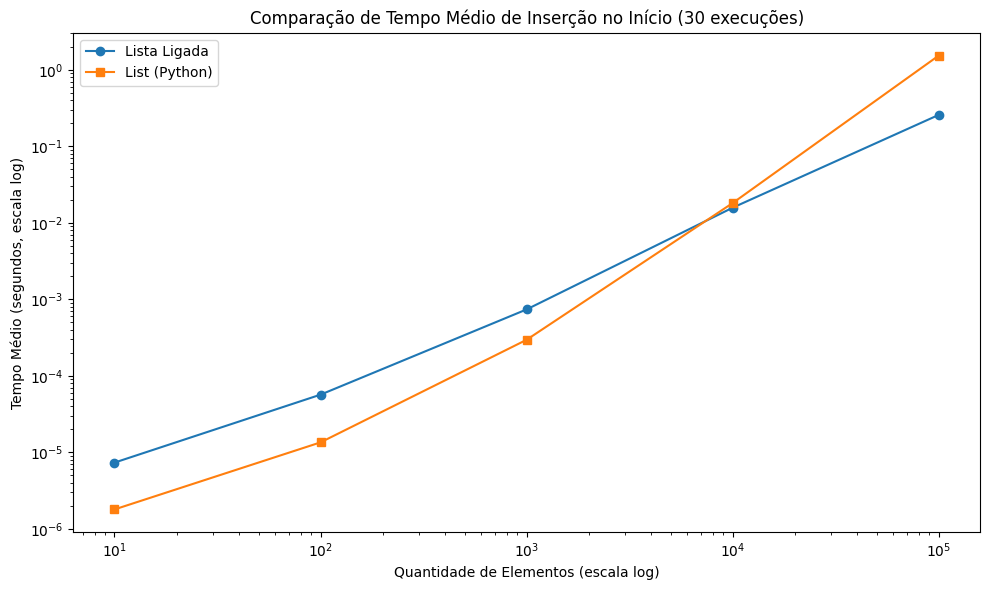

In [ ]:
import time
import matplotlib.pyplot as plt

# ---------- Função para Testes com Média de Execuções ----------

def calcular_tempo_medio(func, qtd, execucoes=30):
    tempos = []
    for _ in range(execucoes):
        inicio = time.perf_counter()
        func(qtd)
        fim = time.perf_counter()
        tempos.append(fim - inicio)
    return sum(tempos) / execucoes

# ---------- Testes Específicos para Cada Estrutura ----------

def teste_lista_ligada(qtd):
    lista = ListaLigada()
    for i in range(qtd):
        lista.inserir_no_inicio(i)

def teste_lista_python(qtd):
    vetor = []
    for i in range(qtd):
        vetor.insert(0, i)  # Inserção no início de lista Python (ineficiente)

# ---------- Execução dos Testes ----------

tamanhos = [10**i for i in range(1, 6)]
tempos_ligada = []
tempos_python = []

for tamanho in tamanhos:
    print(f"Testando inserção de {tamanho} elementos (média de 30 execuções)...")

    tempo_ll = calcular_tempo_medio(teste_lista_ligada, tamanho)
    tempo_py = calcular_tempo_medio(teste_lista_python, tamanho)

    print(f"  Lista Ligada: {tempo_ll:.6f}s | List (Python): {tempo_py:.6f}s")

    tempos_ligada.append(tempo_ll)
    tempos_python.append(tempo_py)

# ---------- Gráfico ----------

plt.figure(figsize=(10, 6))
plt.plot(tamanhos, tempos_ligada, label='Lista Ligada', marker='o')
plt.plot(tamanhos, tempos_python, label='List (Python)', marker='s')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Quantidade de Elementos (escala log)')
plt.ylabel('Tempo Médio (segundos, escala log)')
plt.title('Comparação de Tempo Médio de Inserção no Início (30 execuções)')
plt.legend()
plt.tight_layout()
plt.show()

### **Análise de Desempenho: Inserção no Início**

Os testes comparativos entre listas ligadas e listas nativas do Python revelam padrões distintos de desempenho:

#### **Pequenas quantidades de dados**
- Para volumes reduzidos de inserção, as listas nativas tendem a ser mais rápidas.
- Isso ocorre devido à otimização interna do Python e à ausência de sobrecarga com alocação dinâmica de nós.
- O custo adicional de criar objetos e manipular ponteiros em listas ligadas impacta mais quando o volume é pequeno.

#### **Crescimento da escala**
- À medida que a quantidade de inserções aumenta, o custo da operação `insert(0, valor)` em listas nativas cresce proporcionalmente, pois exige o deslocamento de todos os elementos.
- Listas ligadas mantêm complexidade constante para inserção no início, tornando-se mais vantajosas com o aumento do tamanho.

### **Ponto de virada**
- Em determinado ponto, o tempo de inserção da lista ligada se torna inferior ao da lista nativa.
- Esse ponto destaca a vantagem da lista ligada para inserções no início.



## **Exercícios**

**1. Remover Todos os Nós com Valor Repetido:** Implemente um método `remover_repetidos()` que remove todos os nós duplicados, mantendo apenas a primeira ocorrência de cada valor.




In [ ]:
# Exemplo:
# Entrada: A → B → A → C → B → D
# Saída:   A → B → C → D

**2. Inverter a Lista:** Crie um método `inverter()` que inverte a ordem dos elementos da lista sem usar estruturas auxiliares (pilhas/filas).

In [ ]:
# Entrada: 1 → 2 → 3 → 4
# Saída:   4 → 3 → 2 → 1

**3. Intercalar com Outra Lista:** Implemente intercalar(outra_lista) que recebe outra lista ligada e intercala seus nós com os da lista atual.


In [ ]:
# Lista 1: A → C → E
# Lista 2: B → D → F
# Resultado: A → B → C → D → E → F

**4. Remover Nós com Valor Maior que X:** Crie um método `remover_maiores_que(x)` que remove todos os nós com valor maior que `x`.

In [ ]:
# Lista: 3 → 7 → 2 → 9 → 1
# x = 5 → Saída: 3 → 2 → 1

**5. Dividir em Duas Metades:** Crie `dividir_em_metades()` que divide a lista ao meio e retorna duas novas listas ligadas.

In [ ]:
# Entrada: A → B → C → D → E
# Saída:
# Lista 1: A → B → C
# Lista 2: D → E

**6. Ordenar a Lista:** Implemente `ordenar()` que ordena a lista ligada, utilizando ordenação por inserção ou merge sort.

In [ ]:
# Lista original: D → B → A → F → C → E
# ordenar()
# Resultado: A → B → C → D → E → F

**7. Remover Intervalo:** Crie `remover_intervalo(inicio, fim)` que remove todos os nós entre os índices inicio e fim (inclusive).

In [ ]:
# Lista: A → B → C → D → E → F
# remover_intervalo(2, 4)
# Resultado: A → B → F

**8. Comparar Igualdade:** Implemente `eh_igual(outra_lista)` que verifica se duas listas possuem os mesmos valores, na mesma ordem.

In [ ]:
# Lista 1: A → B → C → D
# Lista 2: A → B → C → D
# eh_igual(lista1, lista2)
# Resultado: True

# Lista 3: A → B → X → D
# eh_igual(lista1, lista3)
# Resultado: False